In [1]:
import mkvdecoder
import numpy as np

# Shakespeare in color 

In [2]:
with open('text_data/all_shakespere.txt', 'r') as myfile:
    shakespeare = ''
    for line in myfile:
        shakespeare+=line

In [3]:
import matplotlib.pyplot as plt

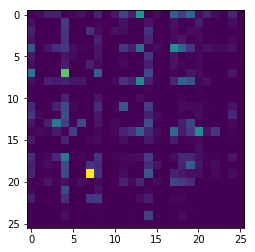

In [4]:
shakespeare_matrix = mkvdecoder.text_to_matrix(shakespeare, True)
plt.imshow(shakespeare_matrix)
plt.show()

#  fitness graph (main)

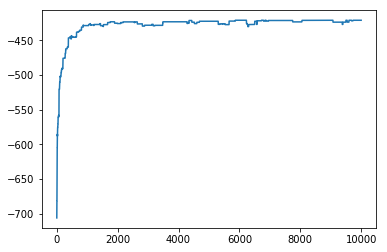

In [9]:
cipher = mkvdecoder.random_cipher()
inverted_true_cipher = mkvdecoder.random_cipher()
ref_matr = mkvdecoder.ref_matrix_regularize(shakespeare_matrix)
text = ('lets see if this text can be deciphered efficiently by our algorithm \n'
        +'the quick brown fox jumps over the lazy dog')
#text = shakespeare[1000:2000]
enc_text = mkvdecoder.decode_text(text, inverted_true_cipher)
enc_matr = mkvdecoder.text_to_matrix(enc_text, False)

fitness_vec=[]

for _ in range(10000):
    cipher = mkvdecoder.metropolis_step(ref_matr, enc_matr, cipher)
    fitness_vec+=[ mkvdecoder.fitness(ref_matr, mkvdecoder.decode_matrix(enc_matr,cipher) ) ]

plt.plot(np.log(fitness_vec))
plt.show()

In [10]:
cipher

array([12, 13, 24,  9,  0,  8, 14,  7,  1, 10, 18,  2, 25,  4,  3, 22, 19,
       16, 21, 23,  5, 15,  6, 17, 20, 11])

In [11]:
mkvdecoder.decode_text(enc_text, cipher)

'imnl lmm jb npjl nmwn auy dm omajfpmtmo mbbjajmynik dk zrt uigztjnph \nnpm qrjax dtzey bzw crhfl zsmt npm iuvk ozg'